In [1]:
#Libraries used in this project

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
 
from sklearn import svm 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# plotting style
sns.set_style('darkgrid')

In [3]:
#loading the data into memory, the head() shows first five rows of the data
parkinson_data = pd.read_excel("parkinsons.xlsx")
parkinson_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
parkinson_data.shape

(195, 24)

This parkinson dataset has 24 features <br> 
and 195 observations, each feature in the <br> 
dataset give us information about the voice <br> 
measure of the patient

In [5]:
parkinson_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


The describe method gives us statistical <br> 
information about the dataset, we can see <br> 
that,50 percent of MDVP:Fo(Hz) is more than 148.79<br>

In [6]:
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

With the info() method, we know that there <br> 
are no missing values in the dataset, <br> 
and most of the features is a float data type <br>
which will be friendly to our selected algorithm <br>
to learn this data <br> 
<br> 
We also have information about how much memory <br> 
is being used


In [7]:
parkinson_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

Since this is a classification problem, <br> 
knowing the distribution of the target columns <br> 
will help us in determining the kind of algorithm <br> 
to use and how to tackle this problem 

We can see that, there are more respondents with parkinson <br> 
disease as compared to those without parkinson disease

Visualizing this will be much helpful 

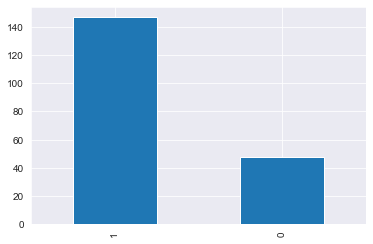

In [8]:
parkinson_data['status'].value_counts().plot(kind='bar')
plt.show() 

This plot clearly show's there are more respondent <br>
with parkinson disease than those without the disease

# ANALYSIS


To understand this neurodegenerative disease further, <br> 
we will be answering these question below <br> 

1. How different is a PD patient's voice from that of a healthy person ?
2. How do the HNR and NHR of a respondent with Parkinson's disease relate to one another?
3. Does an increase in Signal fractal scaling exponent affect average vocal fundamental frequency ?
<br>
<br>

Question 1: <br>
      How different is a PD patient's voice from that of a healthy person ?

In [9]:
# dataframe of all patient with parkinson disease
PD_patient = parkinson_data[parkinson_data['status'] == 1]

In [10]:
#dataframe of all healthy respondent
healthy_patient = parkinson_data[parkinson_data['status'] == 0]

In [11]:
PD_patient.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,...,147.000000,147.000000,147.000000,147.0,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.053027,0.029211,20.974048,1.0,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828
std,32.348050,88.339180,32.274358,0.005240,0.000037,0.003241,0.002998,0.009724,0.019970,0.207798,...,0.032391,0.044447,4.339143,0.0,0.101254,0.054786,0.970792,0.077809,0.375742,0.084271
min,88.333000,102.145000,65.476000,0.001680,0.000010,0.000680,0.000920,0.002040,0.010220,0.090000,...,0.013640,0.002310,8.441000,1.0,0.263654,0.574282,-7.120925,0.063412,1.765957,0.093193
25%,117.572000,133.776500,80.875500,0.004005,0.000030,0.002030,0.002190,0.006085,0.018295,0.168000,...,0.027400,0.008445,18.782000,1.0,0.439064,0.685569,-6.038300,0.199507,2.180933,0.170103
50%,145.174000,163.335000,99.770000,0.005440,0.000040,0.002840,0.003140,0.008530,0.028380,0.263000,...,0.044510,0.016580,21.414000,1.0,0.530529,0.726652,-5.440040,0.240875,2.439597,0.222716
75%,170.071000,207.160500,129.240000,0.007670,0.000060,0.004100,0.004360,0.012300,0.042525,0.394500,...,0.068455,0.027960,24.164500,1.0,0.604573,0.764868,-4.664067,0.303660,2.668479,0.274397
max,223.361000,588.518000,199.020000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,29.928000,1.0,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [12]:
healthy_patient.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.00000,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.028511,0.011483,24.67875,0.0,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
std,52.731067,96.727067,58.757070,0.002055,0.000015,0.001066,0.000943,0.003199,0.005544,0.057822,...,0.010368,0.019088,3.43454,0.0,0.092199,0.051346,0.642782,0.062982,0.310269,0.044820
min,110.739000,113.597000,74.287000,0.001780,0.000007,0.000920,0.001060,0.002760,0.009540,0.085000,...,0.014030,0.000650,17.88300,0.0,0.256570,0.626710,-7.964984,0.006274,1.423287,0.044539
25%,120.947500,139.413250,98.243750,0.002655,0.000010,0.001332,0.001480,0.003998,0.014475,0.129000,...,0.022060,0.004188,22.99325,0.0,0.372126,0.654291,-7.257665,0.120623,1.974217,0.094658
50%,198.996000,231.161500,113.938500,0.003355,0.000025,0.001625,0.001775,0.004875,0.016705,0.154000,...,0.026330,0.004825,24.99700,0.0,0.435368,0.682527,-6.826448,0.167356,2.129510,0.115118
75%,229.077000,251.239250,199.183000,0.004530,0.000030,0.001908,0.002228,0.005725,0.020210,0.189250,...,0.034540,0.009213,26.13925,0.0,0.507748,0.742284,-6.350146,0.193766,2.339487,0.147761
max,260.105000,592.030000,239.170000,0.013600,0.000080,0.006240,0.005640,0.018730,0.040870,0.405000,...,0.070080,0.107150,33.04700,0.0,0.663842,0.785714,-5.198864,0.291954,2.882450,0.252404


MDVP:Fo(Hz) is the average vocal fundamental frequency <br> 
in this dataset. <br> 

As seen above, the average vocal frequency of a healthy patient <br> 
is about 181.93 Hz compared to a patient with parkinson disease <br> 
which is 145.18 Hz. 
This show's a difference in the quality of voice of both patients <br>

A first sign of parkinson disease is the change in the quality of voice,<br> 
the person may notice a reduced volume, monotone pitch and breathiness <br> 
or hoarseness in voice

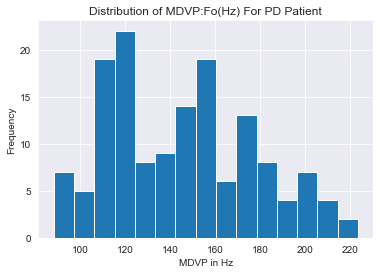

In [13]:
PD_patient['MDVP:Fo(Hz)'].plot(kind='hist', bins=15)
plt.xlabel("MDVP in Hz")
plt.title("Distribution of MDVP:Fo(Hz) For PD Patient")
plt.show() 

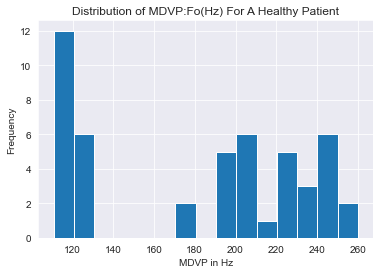

In [14]:
healthy_patient['MDVP:Fo(Hz)'].plot(kind='hist', bins=15)
plt.xlabel("MDVP in Hz")
plt.title("Distribution of MDVP:Fo(Hz) For A Healthy Patient")
plt.show() 


<br>
<br>
<br>


Question 2: <br>
How do the HNR and NHR of a respondent with Parkinson's disease relate to one another?

HNR and NHR are the ratio of noise to tonal<br> 
components in the voice of a patient <br> 
we will visualize these two features and find <br> 
out about the correlation between them <br>

In [15]:
PD_patient.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


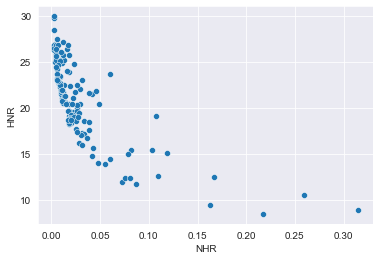

In [16]:
sns.scatterplot(x=PD_patient['NHR'], y=PD_patient['HNR'])
plt.show()

In [17]:
PD_patient['NHR'].corr(PD_patient['HNR'])

-0.7279896930040246

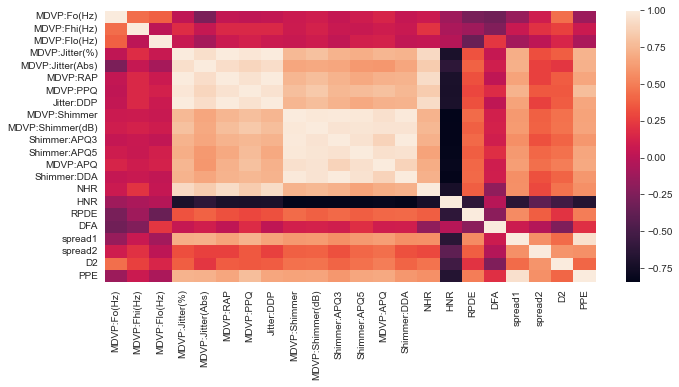

In [18]:
plot = plt.figure(figsize=(11, 5))
corr = PD_patient.drop(columns='status', axis='columns').corr()
sns.heatmap(corr)
plt.show()

from the above graph, NHR (noise/harmonic ratio) and HNR (harmonic/noise ratio) measures <br>
are inversely proportional values. <br>
They assess the presence of noise in a voice signal;<br>
and they are directly related with voice quality. <br> 
A lower NHR and a higher HNR indicate superior voice quality.

<br>

Question 3:<br>
    Does an increase in Signal fractal scaling exponent affect average vocal fundamental frequency ?


Another way we can frame this question is; <br>
Is there a relationship between the signal fractal <br> 
scaling exponent and average vocal fundamental frequency <br> 

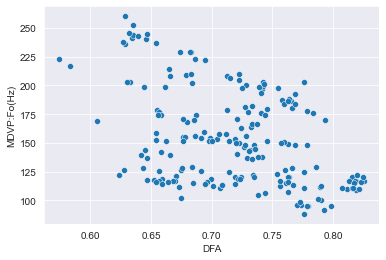

In [19]:
sns.scatterplot(x=parkinson_data['DFA'], y=parkinson_data['MDVP:Fo(Hz)'])
plt.show()

In [20]:
parkinson_data['DFA'].corr(parkinson_data['MDVP:Fo(Hz)'])

-0.4460132918988155

The plot above show there is a strong negative <br> 
relationship between the two variables <br> 
with a correlation coefficient of -0.44


<br>

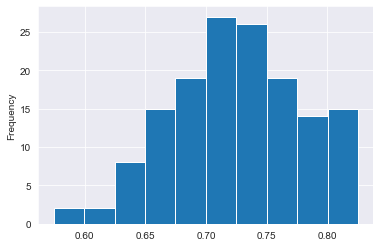

In [21]:
PD_patient['DFA'].plot(kind='hist')
plt.show()

<br> 
<br>

# PREPROCESSING 

In [22]:
#Preprocessing the data for the model 
X = parkinson_data.drop(columns=['name', 'status'])
y = parkinson_data['status']
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=133, stratify = y)

In [23]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [24]:
print({
    "X_train shape" : X_train.shape,
    "X_test shape" : X_test.shape, 
    "X shape" : X.shape, 
    "y shape" : y.shape
})

{'X_train shape': (156, 22), 'X_test shape': (39, 22), 'X shape': (195, 22), 'y shape': (195,)}


# MODEL TRAINING AND EVALUATION

In [26]:
model = svm.SVC(kernel='poly', C= 8)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {accuracy}")


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy}")

Train accuracy: 0.8974358974358975
Test accuracy: 0.8717948717948718


The model performs well on the testing data <br> 
with an accuracy of 0.87. Also, our model did not <br>
overfit as the difference between the train and test <br>
accuracies is small

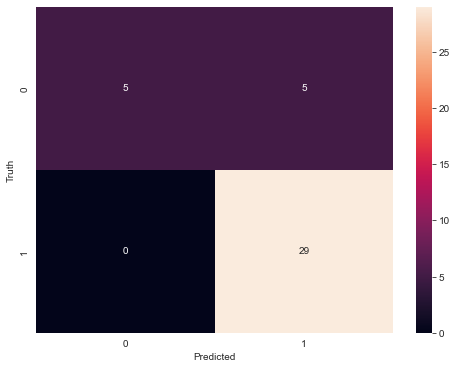

In [27]:
# making a confusion matrix 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm , annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

The confusion matrix tell's us how well the <br> 
model performed. <br>
For class 1, the model was able to predict as 1 (True positive)<br>
29 times, and it predicted a class of 0 as 1 five times <br> 
Overall, the model performed well


<br> 

In [31]:
def make_prediction(data):
    """
       Funtion to produce predictions based on input data
        Args: 
            data - input data 
        Return:
            None 
    """
    data = np.asarray(input_data)
    data = data.reshape(1, -1)
    data = scaler.transform(data)
    
    prediction = model.predict(data)
    
    
    if prediction[0] == 1:
        print("Patient has parkinson")
    else: 
        print("Patient is healthy")

In [32]:
input_data = (120.552, 131.162, 113.787, 0.00968, 0.00008, 0.00463, 0.0075, 0.01388, 0.04701, 0.456, 0.02328, 0.03526, 0.03243, 0.06985, 0.01222, 21.378, 0.415564, 0.825069, -4.242867, 0.299111, 2.18756, 0.357775)

In [33]:
make_prediction(input_data) 

Patient has parkinson
